In [74]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [75]:
train_df=pd.read_csv('C:/Users/amita/Projects/Loan_Approval_Prediction/DATA/train.csv')

In [76]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,Co Applicant Income,Loan Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [77]:
train_df.shape

(614, 13)

In [78]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Loan_ID              614 non-null    object 
 1   Gender               601 non-null    object 
 2   Married              611 non-null    object 
 3   Dependents           599 non-null    object 
 4   Education            614 non-null    object 
 5   Self_Employed        582 non-null    object 
 6    Applicant Income    614 non-null    int64  
 7   Co Applicant Income  614 non-null    float64
 8   Loan Amount          592 non-null    float64
 9   Loan_Amount_Term     600 non-null    float64
 10  Credit_History       564 non-null    float64
 11  Property_Area        614 non-null    object 
 12  Loan_Status          614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [79]:
train_df.describe()

,Applicant Income,Co Applicant Income,Loan Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [80]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', ' Applicant Income', 'Co Applicant Income',
       'Loan Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [81]:
train_df[' Applicant Income']

0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name:  Applicant Income, Length: 614, dtype: int64

C:\Users\amita\AppData\Local\Temp\ipykernel_12892\3658546025.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[' Applicant Income'])


<Axes: xlabel=' Applicant Income', ylabel='Density'>

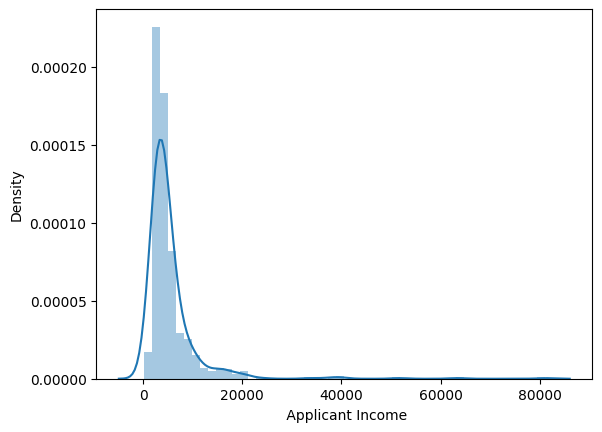

In [82]:
sns.distplot(train_df[' Applicant Income'])

<Axes: xlabel='Gender', ylabel='count'>

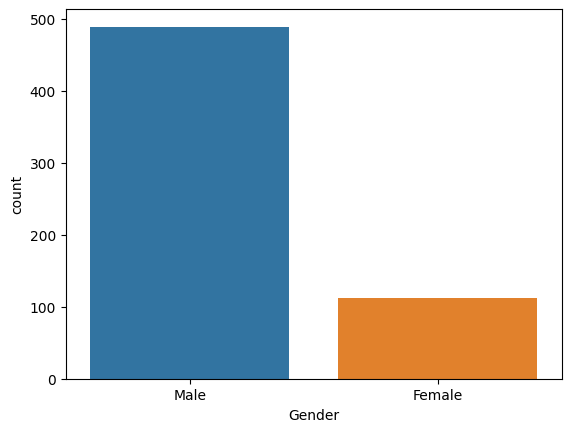

In [83]:
sns.countplot(x='Gender',data=train_df)

<Axes: xlabel='Property_Area', ylabel='count'>

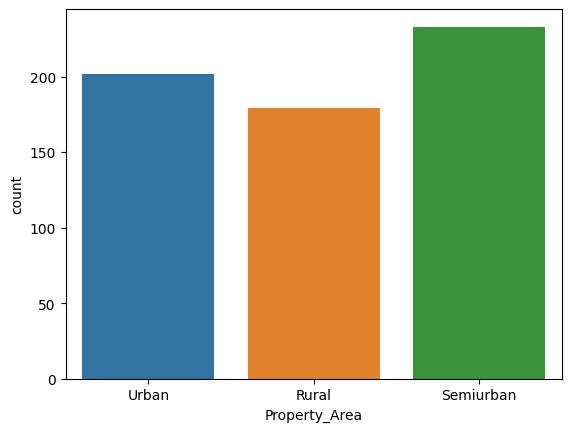

In [84]:
sns.countplot(x='Property_Area',data=train_df)

<Axes: xlabel='Education', ylabel='count'>

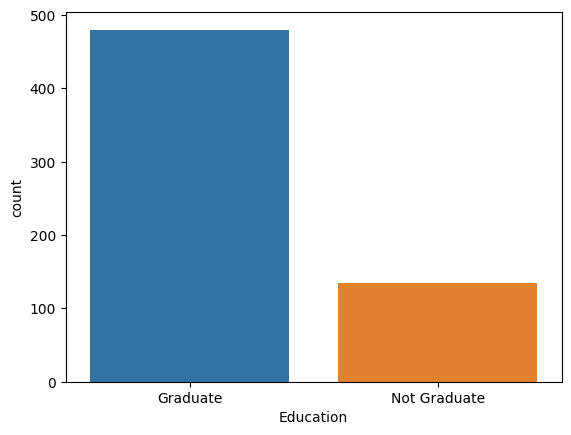

In [85]:
sns.countplot(x='Education',data=train_df)

<Axes: xlabel='Married', ylabel='count'>

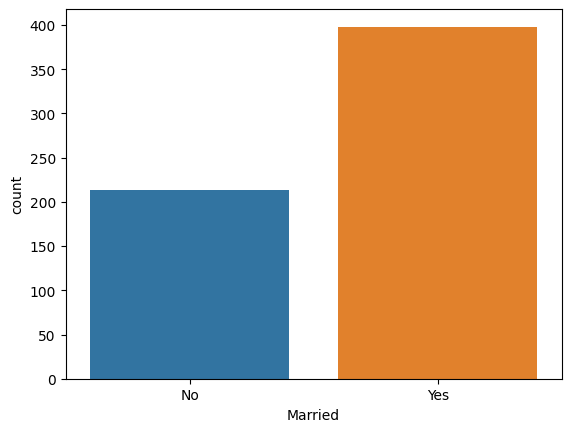

In [86]:
sns.countplot(x='Married',data=train_df)

<Axes: xlabel='Loan Amount', ylabel='Count'>

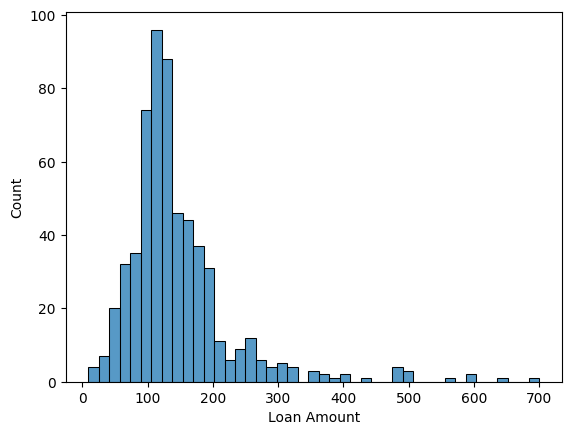

In [87]:
sns.histplot(train_df['Loan Amount'])

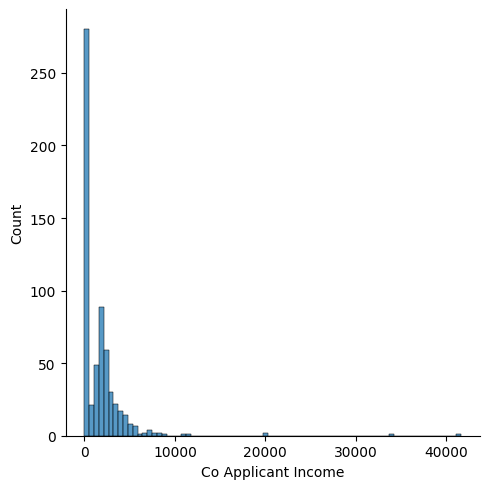

In [88]:
sns.displot(train_df['Co Applicant Income'])

In [89]:
train_df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1f79f891400>,
 [Text(0.40661098511372595, 1.0220897743275028, 'Semi urban'),
  Text(-1.0582795633383781, -0.3000739339235115, 'Urban'),
  Text(0.67000963198199, -0.8724030565348555, 'Rural')])

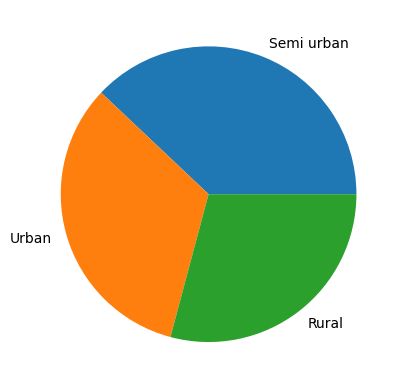

In [90]:
plt.pie(train_df['Property_Area'].value_counts(),[0,0,0],labels=['Semi urban','Urban','Rural'])

<Axes: xlabel=' Applicant Income', ylabel='count'>

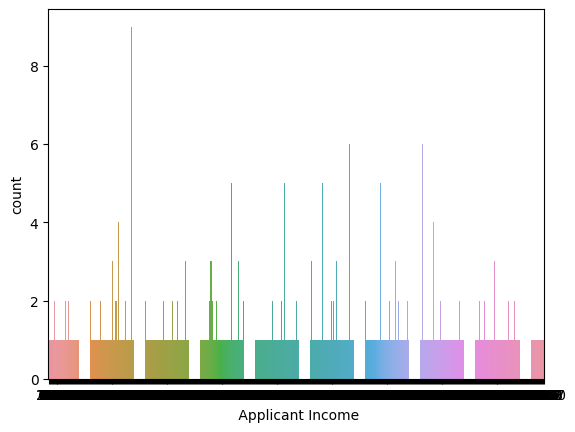

In [91]:
#sns.countplot(train[' Applicant Income'],hue=train['Co Applicant Income'])

sns.countplot(x=' Applicant Income',data=train_df)

In [92]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', ' Applicant Income', 'Co Applicant Income',
       'Loan Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

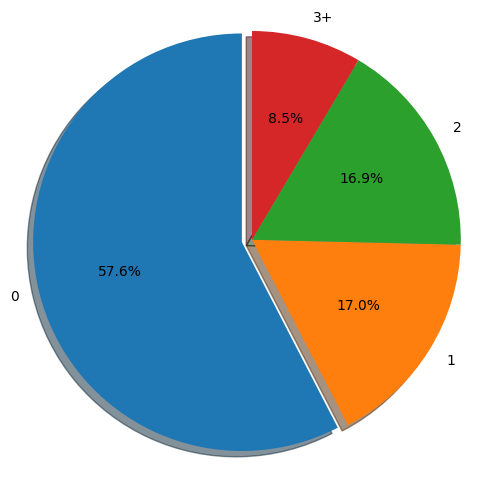

In [93]:
plt.figure(figsize=(6,6))
labels = ['0' , '1', '2' , '3+']
explode = (0.05, 0, 0, 0)
size = [345 , 102 , 101 , 51]

plt.pie(size, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [94]:
train_df.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

<Axes: ylabel='count'>

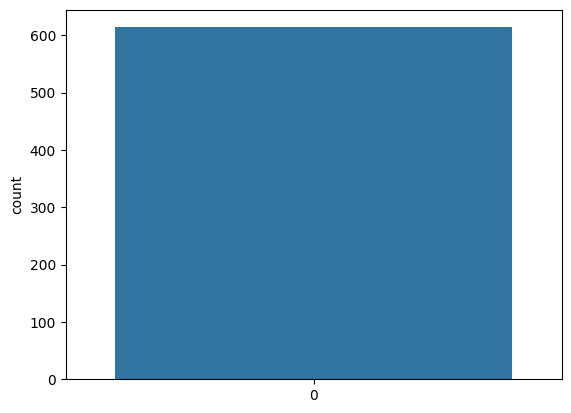

In [95]:
sns.countplot(train_df['Credit_History'])

In [96]:
pd.crosstab(train_df.Credit_History , train_df.Loan_Status, margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [97]:
train_df.isnull().sum()

Loan_ID                 0
Gender                 13
Married                 3
Dependents             15
Education               0
Self_Employed          32
 Applicant Income       0
Co Applicant Income     0
Loan Amount            22
Loan_Amount_Term       14
Credit_History         50
Property_Area           0
Loan_Status             0
dtype: int64

In [98]:
train_df['Self_Employed'].isnull

<bound method Series.isnull of 0       No
1       No
2      Yes
3       No
4       No
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 614, dtype: object>

In [99]:
train_df.Loan_Status=train_df.Loan_Status.map({'Y':1,'N':0})

In [100]:
train_df['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

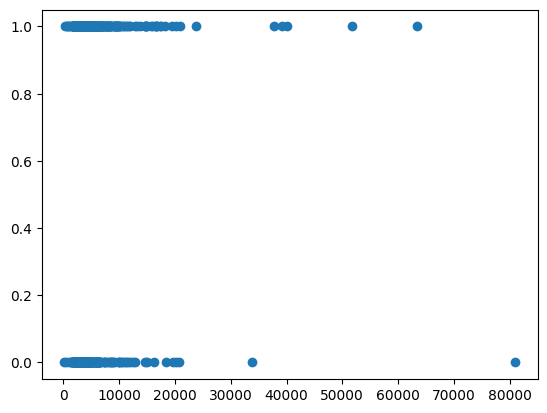

In [104]:
plt.scatter(train_df[' Applicant Income'], train_df['Loan_Status'])

In [103]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', ' Applicant Income', 'Co Applicant Income',
       'Loan Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [108]:
train_df['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [109]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,Co Applicant Income,Loan Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [114]:
Loan_status=train_df['Loan_Status']
train_df.drop(['Loan_Status'],axis=1,inplace=True)
df_te=pd.read_csv('C:/Users/amita/Projects/Loan_Approval_Prediction/DATA/test.csv')
Loan_ID=df_te.Loan_ID
data=train_df.append(df_te)

KeyError: 'Loan_Status'

In [115]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,Co Applicant Income,Loan Amount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [117]:
train_df.shape

(614, 12)

In [118]:
train_df.Dependents.dtypes

dtype('O')

In [ ]:
train_df

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
corrmat=train_df.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

ValueError: could not convert string to float: 'Male'

In [120]:
train_df.drop(['Loan_ID'],axis=1,inplace=True)